In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

### 1. Загрузите файл HR.csv в pandas dataframe

In [4]:
data_set = pd.read_csv('C:\\Users\\Liliya\\Documents\\Netology\\DIPLOMA\\HR.csv')
data_set.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
data_set.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data_set.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Основные статистические показатели, за исключением моды, в библиотеке pandas выводятся командой describe. Мода выведена отдельной командой.

### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные.

<AxesSubplot:>

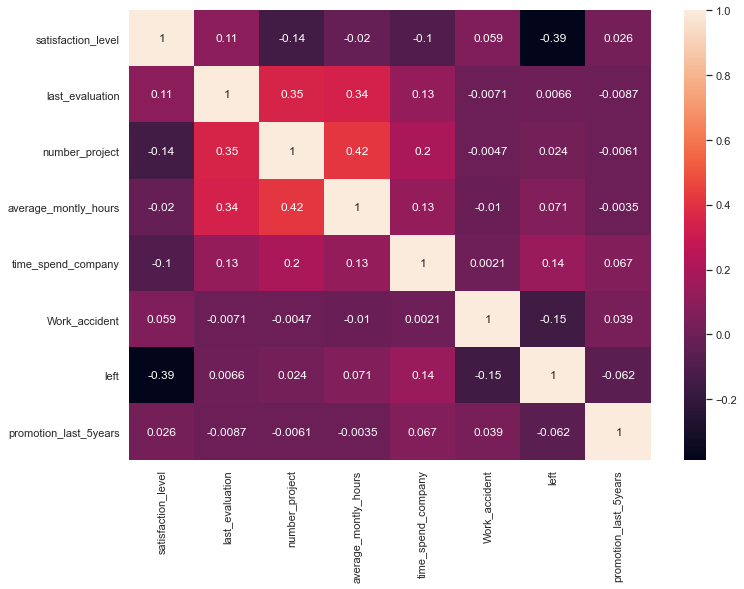

In [33]:
# корреляционная матрица Пирсона
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data_set.corr(), annot=True)

### Наиболее скоррелированные переменные:

In [23]:
print(data_set[['satisfaction_level', 'left']].corr())
print('----------------------------------------------')
print(data_set[['number_project', 'average_montly_hours']].corr())

                    satisfaction_level      left
satisfaction_level            1.000000 -0.388375
left                         -0.388375  1.000000
----------------------------------------------
                      number_project  average_montly_hours
number_project              1.000000              0.417211
average_montly_hours        0.417211              1.000000


<AxesSubplot:>

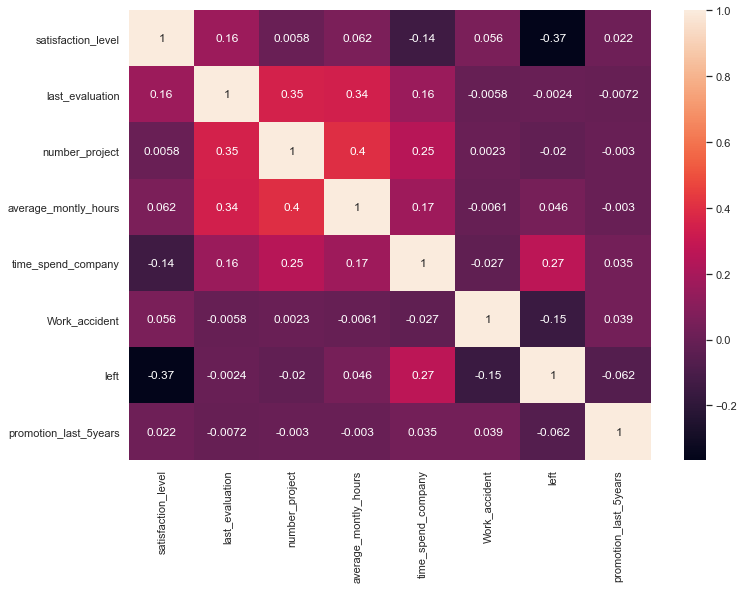

In [34]:
# корреляционная матрица Спирмана
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data_set.corr(method='spearman'), annot=True)

<AxesSubplot:>

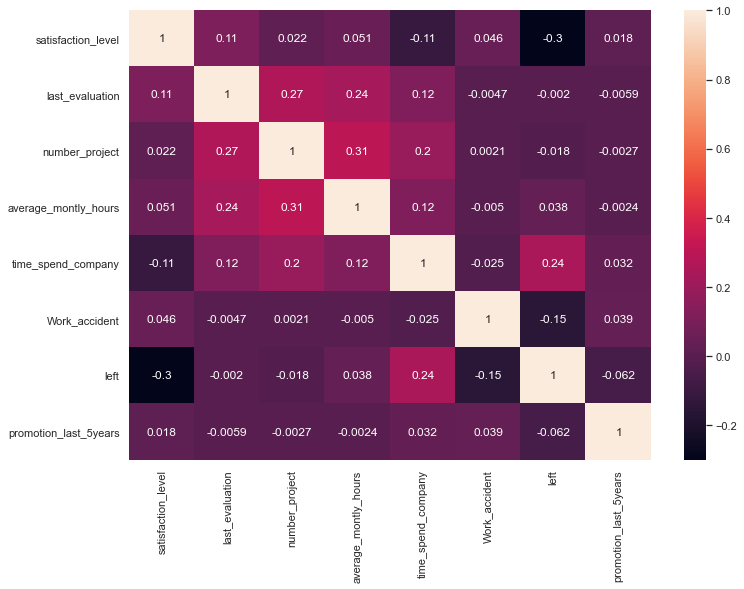

In [35]:
# коррекляционая матрица Кенделла
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data_set.corr(method='kendall'), annot=True)

### Наименее скоррелированные переменные:

In [37]:
print('По методу Писорсона наименее скоррелированными являются: \n', data_set[['last_evaluation', 'left']].corr())
print('----------------------------------------------')
print('По методам Спирмана и Кендала наименее скоррелированными являются: \n', data_set[['last_evaluation', 'left']].corr(method='kendall'))
print('----------------------------------------------')
print(data_set[['time_spend_company', 'Work_accident']].corr())
print('----------------------------------------------')
print('По методам Спирмана и Кендала наименее скоррелированными являются: \n', data_set[['number_project', 'Work_accident']].corr(method='kendall'))

По методу Писорсона наименее скоррелированными являются: 
                  last_evaluation      left
last_evaluation         1.000000  0.006567
left                    0.006567  1.000000
----------------------------------------------
По методам Спирмана и Кендала наименее скоррелированными являются: 
                  last_evaluation     left
last_evaluation          1.00000 -0.00201
left                    -0.00201  1.00000
----------------------------------------------
                    time_spend_company  Work_accident
time_spend_company             1.00000        0.00212
Work_accident                  0.00212        1.00000
----------------------------------------------
По методам Спирмана и Кендала наименее скоррелированными являются: 
                 number_project  Work_accident
number_project        1.000000       0.002096
Work_accident         0.002096       1.000000


## 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [7]:
data_set['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

## 5. Показать распределение сотрудников по зарплатам.

In [8]:
data_set['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

## 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [9]:
data_set.groupby(['department', 'salary']).size()

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
dtype: int64

## 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [18]:
high_salary = data_set[data_set['salary'] == 'high']['average_montly_hours']
low_salary = data_set[data_set['salary'] == 'low']['average_montly_hours']

In [19]:
t, p_value = stats.ttest_ind(high_salary, low_salary, equal_var = False)
t, p_value

(-0.7624331665385475, 0.4459045542257889)

In [20]:
significance = 0.05

if p_value < significance:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Сотрудники с высоким окладом проводят больше времени на работе, чем сотрудники с низким.""" % (significance))
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы.  
            Сотрудники с высоким окладом не проводят больше времени на работе, чем сотрудники с низким.""" % (significance))

На 0.05 уровене значимости, мы принимаем нулевые гипотезы.  
            Сотрудники с высоким окладом не проводят больше времени на работе, чем сотрудники с низким.


## 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): 
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [5]:
data_set_left = data_set[data_set['left'] == True]
data_set_work = data_set[data_set['left'] == False]

### Доля сотрудников с повышением за последние 5 лет

In [6]:
promotion_work = data_set_work[data_set_work['promotion_last_5years'] == True]['promotion_last_5years'].count() * 100 / data_set_work['promotion_last_5years'].count()

In [8]:
promotion_left = data_set_left[data_set_left['promotion_last_5years'] == True]['promotion_last_5years'].count() * 100 / data_set_left['promotion_last_5years'].count()

In [10]:
print(round(promotion_work, 2), '% работающих сотрудников получали повышение')
print(round(promotion_left, 2), '% уволенных сотрудников получали повышение')

2.63 % работающих сотрудников получали повышение
0.53 % уволенных сотрудников получали повышение


### Средняя степень удовлетворенности

In [11]:
satisfaction_work = data_set_work['satisfaction_level'].mean()

In [12]:
satisfaction_left = data_set_left['satisfaction_level'].mean()

In [13]:
print('Средняя степень удовлетворенности работающих сотрудников: ', round(satisfaction_work, 2))
print('Средняя степень удовлетворенности уволенных сотрудников: ', round(satisfaction_left, 2))

Средняя степень удовлетворенности работающих сотрудников:  0.67
Средняя степень удовлетворенности уволенных сотрудников:  0.44


### Среднее количество проектов

In [15]:
projects_work = data_set_work['number_project'].mean()

In [16]:
projects_left = data_set_left['number_project'].mean()

In [17]:
print('Среднее количество проектов у работающих сотрудников: ', round(projects_work, 2))
print('Средняя количество проеутов у  уволенных сотрудников: ', round(projects_left, 2))

Среднее количество проектов у работающих сотрудников:  3.79
Средняя количество проеутов у  уволенных сотрудников:  3.86


## 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
X = data_set[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = data_set['left']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
model.coef_

array([-6.67146494e-01,  8.94636378e-02, -3.06965508e-02,  6.63799684e-04,
        3.22562759e-02, -1.53085014e-01, -1.58223059e-01])

In [30]:
model.intercept_

0.479535955306176

In [31]:
model.score(X_test, y_test)

0.18326882703830805

Коэффициент детерминации близко расположен к 0, что означает, что связь мжеду величинами отсутствует, либо не носит линейный характер, что не позволяет построить адекватную модель.